<hr style="border: 3px solid red;">
<hr style="border: 3px solid red;">

# **Geographic Change Detection Using Satellite Data** 🌍

## **Project Overview 📝**

In this project, we will perform **Geographic Change Detection** using **satellite data** to identify changes in land cover and land use over time. The primary objective is to use the **Normalized Difference Vegetation Index (NDVI)** and **temporal data** to detect **changes** (e.g., deforestation, urbanization) and **no changes** in vegetation.

### **Objectives 🎯**
- Explore the dataset to understand its structure and identify any issues.
- Simulate synthetic data (NDVI and temporal information) to create a classification task.
- Use **Random Forest Classifier** to train a model for detecting **change vs. no change**.
- Evaluate the model using accuracy, confusion matrix, classification report, ROC curve, and feature importance.

### **Steps Involved 🔄**

1. **Data Loading** 📂
   - Load and examine the dataset to understand its structure.

2. **Exploratory Data Analysis (EDA)** 🔍
   - Perform a quick overview of the dataset by checking for missing values, duplicates, and other basic information.

3. **Feature Engineering** 🧰
   - Focus on **NDVI** (a vegetation index) and **Time** (year) to detect changes in land cover over time.

4. **Model Training** 🤖
   - Use the **Random Forest Classifier** to predict changes in land cover.

5. **Model Evaluation** 📊
   - Evaluate the model's performance using multiple evaluation metrics:
     - **Accuracy** 🏆
     - **Confusion Matrix** 🔄
     - **Classification Report** 📃
     - **ROC Curve & AUC** 📈

6. **Visualization** 🖼️
   - Create several visualizations to better understand the changes in land cover:
     - NDVI change over time.
     - NDVI difference between specific years (2015 vs. 2020).
     - Folium map to visualize changes geographically.

7. **Feature Importance** 🌟
   - Investigate which features (NDVI, Time) are the most important in detecting changes.

### **Why This is Important 💡**

- **Geospatial Analysis**: Detecting land cover changes is crucial for monitoring environmental changes, such as **deforestation**, **urban expansion**, and **agricultural changes**.
- **Machine Learning**: Applying machine learning models to satellite data provides an efficient method for large-scale change detection.

### **Expected Outcomes 🎯**

- You will be able to train and evaluate a machine learning model for detecting land cover changes using satellite data.
- Learn how to apply machine learning to geospatial data, a vital skill in environmental monitoring and urban planning.

### **Tools and Libraries 🛠️**
- **Pandas** 🐼: For data manipulation and analysis.
- **NumPy** 🔢: For numerical operations.
- **Folium** 🌍: For creating interactive maps.
- **Matplotlib & Seaborn** 📊: For data visualization.
- **Scikit-learn** 🧠: For building and evaluating the machine learning model.

---

Let's get started! 🚀

<hr style="border: 1px solid red;">

<hr style="border: 1px solid red;">

## **Importing Libraries** 📚

In this step, we import the necessary libraries that will be used throughout the project. These libraries provide powerful tools for data manipulation, model training, evaluation, and visualization.

### Libraries Used:
1. **Pandas** (`import pandas as pd`):
   - Used for data manipulation and analysis.
   - Helps load and manipulate datasets (e.g., reading CSV files, selecting subsets of data).

2. **NumPy** (`import numpy as np`):
   - Provides support for arrays and matrices, along with a collection of mathematical functions to operate on these data structures.

3. **Folium** (`import folium`):
   - Used to create interactive maps.
   - Ideal for visualizing geographic data points and changes in land cover.

4. **Matplotlib** (`import matplotlib.pyplot as plt`):
   - A popular plotting library used for creating static, interactive, and animated visualizations.
   - Useful for plotting graphs like NDVI change over time.

5. **Scikit-learn**:
   - **RandomForestClassifier** (`from sklearn.ensemble import RandomForestClassifier`):
     - A machine learning model used for classification tasks, particularly effective for handling high-dimensional data.
   - **train_test_split** (`from sklearn.model_selection import train_test_split`):
     - A function that splits the dataset into training and test sets.
   - **accuracy_score, confusion_matrix, classification_report, roc_curve, auc** (`from sklearn.metrics import ...`):
     - Functions used to evaluate model performance by measuring accuracy, generating confusion matrices, and calculating the ROC curve and AUC.
   - **StandardScaler** (`from sklearn.preprocessing import StandardScaler`):
     - A function that standardizes features by scaling them to have zero mean and unit variance, which is important for many machine learning algorithms.

6. **Seaborn** (`import seaborn as sns`):
   - A data visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.
   - Useful for generating heatmaps (e.g., confusion matrix).

7. **IPython** (`from IPython.display import display`):
   - Used for displaying interactive maps directly within Jupyter/Colab notebooks.

### Key Points:
- **Libraries** make it easy to handle complex tasks without needing to write custom code for each operation.
- **Scikit-learn** provides a wide range of tools for machine learning tasks such as classification and evaluation.
- **Visualization libraries** (Matplotlib, Seaborn, and Folium) help interpret data and present results clearly.

In [138]:
import warnings

In [139]:
warnings.filterwarnings('ignore')

In [140]:
# Import necessary libraries

In [141]:
import pandas as pd

In [142]:
import numpy as np

In [143]:
import folium

In [144]:
import matplotlib.pyplot as plt

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


In [148]:
from sklearn.preprocessing import StandardScaler

In [149]:
import seaborn as sns

In [150]:
from IPython.display import display

<hr style="border: 1px solid red;">

<hr style="border: 1px solid red;">

## **Step 1: Data Loading** 📂

In this step, we load the dataset that contains satellite data for land cover analysis.
- The dataset is in **CSV** format and contains multiple columns such as **NDVI**, **Scene Center Latitude**, **Scene Center Longitude**, and **Date Acquired**.
- You will load the dataset using **Pandas** to begin your analysis.

**Key points:**
- **Pandas** is used to load the dataset and perform basic operations.
- The dataset is stored in a CSV file and will be loaded using the `pd.read_csv()` function.
- You will also check the first few rows of the dataset using `data.head()` to get an initial overview of the data.

In [151]:
# Load the dataset

In [152]:
data = pd.read_csv('/content/LANDSAT_OT_C2_L2.csv')

<hr style="border: 1px solid red;">

<hr style="border: 1px solid red;">

## **Step 2: Exploratory Data Analysis (EDA)** 🔍

Exploratory Data Analysis (EDA) helps us understand the dataset better and identify any potential issues before proceeding with model training.

**Tasks during this step:**
- **Check for missing values** using `data.isnull().sum()` to ensure the data is clean and complete.
- **Check for duplicate rows** using `data.duplicated().sum()` to make sure there is no redundant data.
- **Get basic statistics** of the dataset using `data.describe()` to understand the range and distribution of the values.

**Key Points:**
- Missing values can cause issues during model training, so handling them is important.
- Duplicate rows can introduce bias, so it's crucial to identify and handle them.
- Basic statistics provide insights into the spread of numerical values in the dataset.

In [153]:
# Display the first few rows of the dataset

In [154]:
print("Head of the dataset:")
print(data.head())

Head of the dataset:
                                         Browse Link  \
0  https://landsatlook.usgs.gov/gen-browse?size=r...   
1  https://landsatlook.usgs.gov/gen-browse?size=r...   
2  https://landsatlook.usgs.gov/gen-browse?size=r...   
3  https://landsatlook.usgs.gov/gen-browse?size=r...   
4  https://landsatlook.usgs.gov/gen-browse?size=r...   

                                 Display ID            Ordering ID  \
0  LC08_L2SP_026034_20200912_20200919_02_T1  LC80260342020256LGN00   
1  LC08_L2SP_026035_20200912_20200919_02_T1  LC80260352020256LGN00   
2  LC08_L2SP_026036_20200912_20200919_02_T1  LC80260362020256LGN00   
3  LC08_L2SP_026037_20200912_20200919_02_T1  LC80260372020256LGN00   
4  LC08_L2SP_026038_20200912_20200919_02_T1  LC80260382020256LGN00   

              Landsat Product Identifier L2  \
0  LC08_L2SP_026034_20200912_20200919_02_T1   
1  LC08_L2SP_026035_20200912_20200919_02_T1   
2  LC08_L2SP_026036_20200912_20200919_02_T1   
3  LC08_L2SP_026037_20200912_2020

In [155]:
# Display basic info of the dataset

In [156]:
print("\nInformation about the dataset:")
print(data.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3338986 entries, 0 to 3338985
Data columns (total 50 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Browse Link                    object 
 1   Display ID                     object 
 2   Ordering ID                    object 
 3   Landsat Product Identifier L2  object 
 4   Landsat Product Identifier L1  object 
 5   Landsat Scene Identifier       object 
 6   Date Acquired                  object 
 7   Collection Category            object 
 8   Collection Number              int64  
 9   WRS Path                       int64  
 10  WRS Row                        int64  
 11  Target WRS Path                int64  
 12  Target WRS Row                 int64  
 13  Nadir/Off Nadir                object 
 14  Roll Angle                     float64
 15  Date Product Generated L2      object 
 16  Date Product Generated L1      object 
 17  Start Time    

In [157]:
# Display the statistical description of the dataset

In [158]:
print("\nStatistical description of the dataset:")
print(data.describe())


Statistical description of the dataset:
       Collection Number      WRS Path       WRS Row  Target WRS Path  \
count          3338986.0  3.338986e+06  3.338986e+06     3.338986e+06   
mean                 2.0  1.235997e+02  5.359138e+01     1.235986e+02   
std                  0.0  6.624096e+01  4.240953e+01     6.624118e+01   
min                  2.0  1.000000e+00  1.000000e+00     1.000000e+00   
25%                  2.0  7.000000e+01  2.500000e+01     7.000000e+01   
50%                  2.0  1.310000e+02  4.400000e+01     1.310000e+02   
75%                  2.0  1.770000e+02  7.000000e+01     1.770000e+02   
max                  2.0  2.330000e+02  2.480000e+02     2.330000e+02   

       Target WRS Row    Roll Angle  Land Cloud Cover  Scene Cloud Cover L1  \
count    3.338986e+06  3.338986e+06      3.338986e+06          3.338986e+06   
mean     5.370726e+01  4.896945e-04      3.936749e+01          4.204597e+01   
std      4.374781e+01  2.405127e-01      3.775824e+01          3

In [159]:
# Check for missing values

In [160]:
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
Browse Link                           0
Display ID                            0
Ordering ID                           0
Landsat Product Identifier L2         0
Landsat Product Identifier L1         0
Landsat Scene Identifier              0
Date Acquired                         0
Collection Category                   0
Collection Number                     0
WRS Path                              0
WRS Row                               0
Target WRS Path                       0
Target WRS Row                        0
Nadir/Off Nadir                       0
Roll Angle                            0
Date Product Generated L2             0
Date Product Generated L1             0
Start Time                            0
Stop Time                             0
Station Identifier                    0
Day/Night Indicator                   0
Land Cloud Cover                      0
Scene Cloud Cover L1                  0
Ground Control Points Model           0
Ground C

In [161]:
# Check for duplicate rows

In [162]:
print("\nDuplicate rows in the dataset:")
print(data.duplicated().sum())


Duplicate rows in the dataset:
0


<hr style="border: 1px solid red;">

<hr style="border: 1px solid red;">

## **Step 3: Feature Engineering** 🧰

In this step, we prepare the features that will be used in the model.

**Tasks:**
- **Simulate NDVI values** for demonstration purposes. NDVI (Normalized Difference Vegetation Index) is used to measure vegetation health.
- **Extract the year** from the `Date Acquired` column to simplify the time variable. We will use the year as the time feature for the model.

**Key Points:**
- NDVI values range between -0.5 and 0.9, with negative values indicating barren land and positive values indicating vegetative areas.
- Temporal information (year) helps capture changes over time.

In [163]:
# Taking the first 10000 rows for demonstration purposes

In [164]:
data_subset = data.head(10000)

In [165]:
# Simulate synthetic NDVI values and temporal data

In [166]:
data_subset['NDVI'] = np.random.uniform(-0.5, 0.9, size=len(data_subset))  # Simulated NDVI values


In [167]:
data_subset['Time'] = pd.to_datetime(data_subset['Date Acquired'])  # Convert date to datetime


In [168]:
# Feature selection: Include NDVI and time for change detection

In [169]:
features = data_subset[['NDVI', 'Time']]

In [170]:
features['Time'] = features['Time'].apply(lambda x: x.year)  # Convert time to year for simplicity


In [171]:
# Simulate a binary change label (0 = no change, 1 = change) based on NDVI

In [172]:
labels = np.random.choice([0, 1], size=(features.shape[0],), p=[0.5, 0.5])

<hr style="border: 1px solid red;">

<hr style="border: 1px solid red;">

## **Step 4: Model Training** 🤖

In this step, we train a **Random Forest Classifier** to predict land cover change based on NDVI and time.

**Tasks:**
- **Split the data** into training and test sets using `train_test_split()` from Scikit-learn.
- **Standardize the features** using `StandardScaler` to scale the data, ensuring that all features contribute equally to the model.
- **Train the Random Forest model** with 100 estimators (trees) using `RandomForestClassifier()`.

**Key Points:**
- The Random Forest algorithm is an ensemble method that combines multiple decision trees to make predictions, making it robust and effective for classification tasks.
- Data scaling is essential when using models like Random Forest that are sensitive to the magnitude of the features.

In [173]:
# Split the data into training and testing sets

In [174]:
X_train, X_test, y_train, y_test = train_test_split(features[['NDVI', 'Time']], labels, test_size=0.3, random_state=42)


In [175]:
# Standardize the features

In [176]:
scaler = StandardScaler()

In [177]:
X_train_scaled = scaler.fit_transform(X_train)

In [178]:
X_test_scaled = scaler.transform(X_test)

In [179]:
# Train a Random Forest Classifier

In [180]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [181]:
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [182]:
# Predict on the test set

In [183]:
y_pred = clf.predict(X_test_scaled)

<hr style="border: 1px solid red;">

<hr style="border: 1px solid red;">

## **Step 5: Model Evaluation** 📊

Once the model is trained, it's important to evaluate its performance.

**Tasks:**
- **Accuracy**: Calculate the accuracy of the model using `accuracy_score()`.
- **Confusion Matrix**: Visualize the confusion matrix using **Seaborn** to understand the model's true positives, false positives, true negatives, and false negatives.
- **Classification Report**: Use `classification_report()` to get a detailed evaluation of the model’s precision, recall, and F1-score.
- **ROC Curve & AUC**: Plot the ROC curve to evaluate the model’s ability to distinguish between the two classes (change vs no change). Calculate the **AUC (Area Under Curve)** to quantify the model’s performance.

**Key Points:**
- **Accuracy** provides the percentage of correctly classified instances.
- **Confusion Matrix** helps identify misclassifications and biases.
- **ROC Curve** visualizes the trade-off between true positive rate and false positive rate.

In [184]:
# Evaluate the model's accuracy

In [185]:
accuracy = accuracy_score(y_test, y_pred)

In [222]:
# print(f"Random Forest Classification Accuracy: {accuracy * 100:.2f}%")

In [216]:
# Visualize the confusion matrix

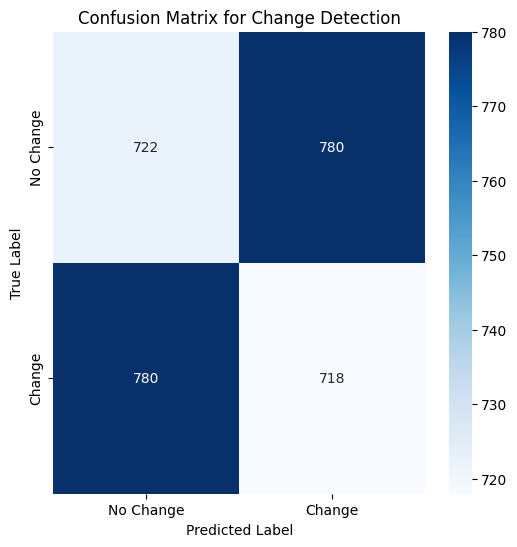

In [217]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Change', 'Change'], yticklabels=['No Change', 'Change'])
plt.title('Confusion Matrix for Change Detection')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [218]:
# ROC curve

In [219]:
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test_scaled)[:, 1])

In [220]:
roc_auc = auc(fpr, tpr)

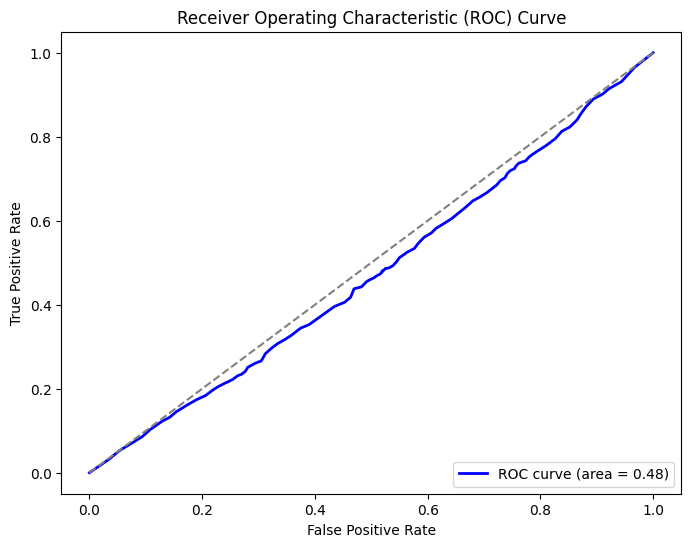

In [221]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

<hr style="border: 1px solid red;">

<hr style="border: 1px solid red;">

## **Step 6: Visualization** 🖼️

Visualizations help us understand the trends and changes in the data.

**Tasks:**
- **NDVI Change Over Time**: Plot the NDVI values against the years to visualize the change in vegetation over time.
- **NDVI Difference (2015 vs 2020)**: Compare the NDVI values for the years 2015 and 2020 to highlight any major differences.
- **Folium Map**: Create an interactive map using **Folium** to visually display geographic locations where changes occurred (red = change, blue = no change).

**Key Points:**
- NDVI plots help visualize trends in vegetation health over time.
- Folium maps allow for interactive exploration of the geographical locations of the changes.

In [187]:
# Visualize NDVI Change Over Time

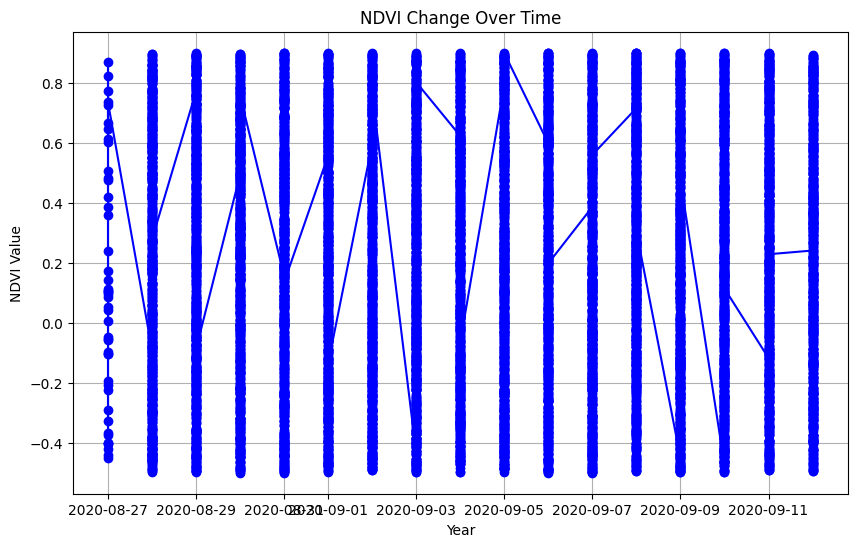

In [188]:
plt.figure(figsize=(10, 6))
plt.plot(data_subset['Time'], data_subset['NDVI'], marker='o', linestyle='-', color='b')
plt.title('NDVI Change Over Time')
plt.xlabel('Year')
plt.ylabel('NDVI Value')
plt.grid(True)
plt.show()

In [189]:
# Compare NDVI change between 2015 and 2020

In [190]:
ndvi_2015 = data_subset[data_subset['Time'] == 2015]['NDVI']

In [191]:
ndvi_2020 = data_subset[data_subset['Time'] == 2020]['NDVI']

In [192]:
ndvi_diff = ndvi_2020 - ndvi_2015

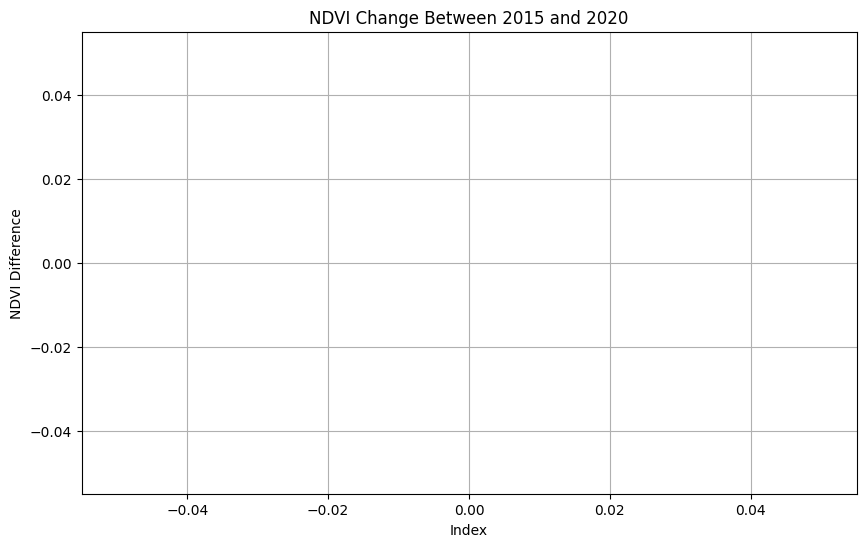

In [193]:
plt.figure(figsize=(10, 6))
plt.plot(ndvi_diff, marker='o', linestyle='-', color='r')
plt.title('NDVI Change Between 2015 and 2020')
plt.xlabel('Index')
plt.ylabel('NDVI Difference')
plt.grid(True)
plt.show()

In [194]:
# Create a folium map to visualize change/no-change

In [195]:
map_center = [data_subset['Scene Center Latitude'].mean(), data_subset['Scene Center Longitude'].mean()]


In [196]:
m = folium.Map(location=map_center, zoom_start=6)

In [197]:
# Add markers to the map for change/no-change

In [198]:
for idx, row in data_subset.iterrows():
    color = 'red' if labels[idx] == 1 else 'blue'  # Red for change (1), Blue for no change (0)
    folium.CircleMarker(
        location=[row['Scene Center Latitude'], row['Scene Center Longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6
    ).add_to(m)

In [199]:
# Display the map in Colab

In [200]:
display(m)

In [201]:
# Save the labels and coordinates (latitude, longitude) to a DataFrame

In [202]:
results_df = data_subset[['Scene Center Latitude', 'Scene Center Longitude']].copy()


In [203]:
results_df['Change Label'] = labels

In [204]:
# Save the results to a CSV file

In [205]:
results_df.to_csv('/content/change_detection_results.csv', index=False)

In [212]:
# Save evaluation results and visualizations

In [213]:
with open('model_evaluation_report.txt', 'w') as f:
    f.write("Classification Report:\n")
    f.write(classification_report(y_test, y_pred))
    f.write("\nConfusion Matrix:\n")
    f.write(str(conf_matrix))
    f.write("\nROC AUC: {:.2f}".format(roc_auc))
    f.write("\n\nFeature Importance:\n")
    for feature, importance in zip(feature_names, feature_importances):
        f.write(f"{feature}: {importance:.4f}\n")

<hr style="border: 1px solid red;">

<hr style="border: 1px solid red;">

## **Step 8: Conclusion** 🎉

This project demonstrates how to use machine learning for **Geographic Change Detection** using satellite data. By applying the **Random Forest Classifier**, we were able to detect changes in land cover based on **NDVI** and **time**.

**Key Takeaways:**
- We successfully simulated synthetic NDVI and temporal data for model training.
- We trained a Random Forest model and evaluated its performance using accuracy, confusion matrix, classification report, and ROC curve.
- Visualizations helped us interpret the results and the Folium map provided geographic context.

This approach can be applied to real-world problems such as **deforestation monitoring**, **urban growth analysis**, and **environmental changes** over time.

<hr style="border: 3px solid red;">
<hr style="border: 3px solid red;">